#Assignment 3

**Name:** Yufan Liu  
**Student ID:** 801442680  
**Homework Number:** 3  

**GitHub Repository:** [https://github.com/hataki-jin/-ECGR-5105-Intro-to-ML](https://github.com/hataki-jin/-ECGR-5105-Intro-to-ML)


##Import libraries



In [4]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Load dataset



In [5]:
# load dataset
breastCancer = load_breast_cancer()
X = breastCancer.data  # (569, 30)
y = breastCancer.target  # (569,)

print(X.shape)
print(y.shape)

Shape of X: (569, 30)
Shape of y: (569,)
Classes: [0 1]  (0 = Malignant, 1 = Benign)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


## Problem 1: Logistic Regression



### (i) Logistic Regression  takes all 30 input features(without penalty)


[P1-i] Logistic Regression(without penalty):
	- Accuracy:  0.9737
	- Precision: 0.9722
	- Recall:    0.9859
	- F1 Score:  0.9790


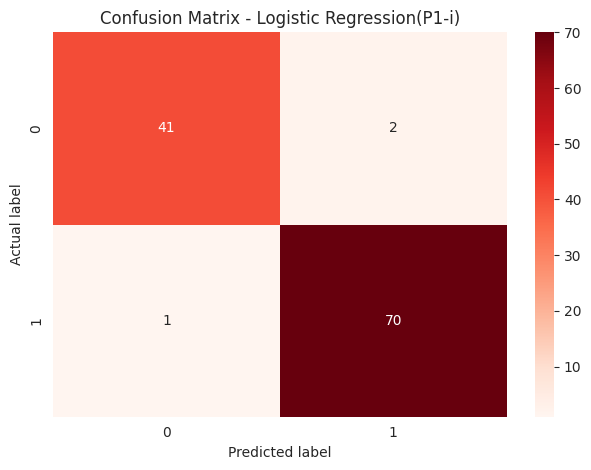

In [22]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature scaling to scale data between 0 and 1
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# [P1-i] Import Logistic Regression and train the model on the training data
classifier = LogisticRegression(random_state=42, max_iter=500)  # by default, penalty='l2', C=1.0
classifier.fit(X_train_scaled, y_train)

# Predict the target for the test data
y_pred = classifier.predict(X_test_scaled)

# Evaluate the classifier performance in terms of accuracy, precision and recall
acc_LR = accuracy_score(y_test, y_pred)
prec_LR = precision_score(y_test, y_pred)
rec_LR = recall_score(y_test, y_pred)
f1_LR = f1_score(y_test, y_pred)

print(f"[P1-i] Logistic Regression(without penalty):\n\t"
      f"- Accuracy:  {acc_LR:.4f}\n\t"
      f"- Precision: {prec_LR:.4f}\n\t"
      f"- Recall:    {rec_LR:.4f}\n\t"
      f"- F1 Score:  {f1_LR:.4f}")

# Performance evaluation: Use confusion matrix to see the performance of the model
cnf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Reds', fmt='g')
plt.title("Confusion Matrix - Logistic Regression(P1-i)")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.savefig("images/Confusion Matrix(P1-i).png")
plt.tight_layout()
plt.show()


### Conclusions(Problem1-i)

A logistic regression model was trained using all 30 features from the breast cancer dataset. The dataset was split into 80% training and 20% test data, and standardized before training. The model achieved the following performance metrics:

Accuracy: 97.37%

Precision: 97.22%

Recall: 98.59%

The confusion matrix illustrates strong classification performance with very few misclassifications, **but** there is still 1 cancer patient who has **not been detected**.



### (ii) Logistic Regression with penalty(L2)


[P1-ii] Logistic Regression(with penalty):
	- Accuracy:  0.9825
	- Precision: 0.9726
	- Recall:    1.0000
	- F1 Score:  0.9861


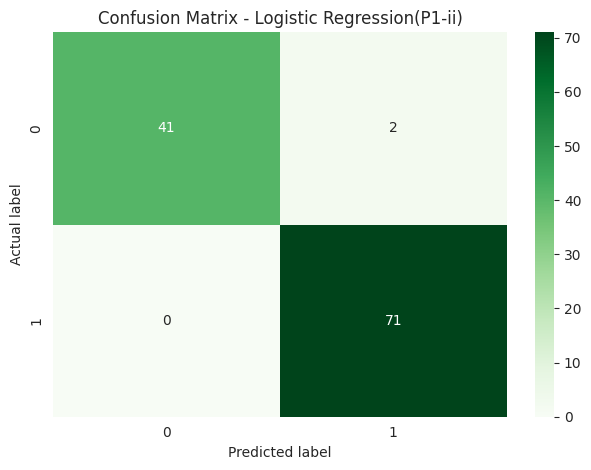

In [23]:
# [P1-ii] Logistic Regression with penalty
classifier_p = LogisticRegression(penalty='l2', C=0.1, random_state=42, max_iter=500) # C: Inverse of regularization strength
classifier_p.fit(X_train_scaled, y_train)

# Predict the target for the test data
y_pred_p = classifier_p.predict(X_test_scaled)

# Evaluate the classifier performance in terms of accuracy, precision and recall
acc_LR_p = accuracy_score(y_test, y_pred_p)
prec_LR_p = precision_score(y_test, y_pred_p)
rec_LR_p = recall_score(y_test, y_pred_p)
f1_LR_p = f1_score(y_test, y_pred_p)

print(f"[P1-ii] Logistic Regression(with penalty):\n\t"
      f"- Accuracy:  {acc_LR_p:.4f}\n\t"
      f"- Precision: {prec_LR_p:.4f}\n\t"
      f"- Recall:    {rec_LR_p:.4f}\n\t"
      f"- F1 Score:  {f1_LR_p:.4f}")

# Performance evaluation: Use confusion matrix to see the performance of the model
cnf_matrix_p = confusion_matrix(y_test, y_pred_p)

# Visualize the confusion matrix using a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_p), annot=True, cmap='Greens', fmt='g')
ax.xaxis.set_label_position("top")
plt.title("Confusion Matrix - Logistic Regression(P1-ii)")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.savefig("images/Confusion Matrix(P1-ii).png")
plt.tight_layout()
plt.show()

### Conclusion(Problem1-ii)

In this time, we add a penality to the Linear Regression with C=0.1(inverse of the regularization strength), with the adjust of weights, the model achieved the following performance metrics:

**Accuracy:** 98.25%

**Precision:** 97.26%

**Recall:** 100%

By adding the penality, all three values increases, and the rate of **recall** reach to **100%**, means that the model has **found all of the cancer patients**, but there is still 2 patient without cancer who have been detected to cancer patients.


## Problem 2: Naive Bayes Classifier



[P2] Naive Bayes:
	- Accuracy:  0.9649
	- Precision: 0.9589
	- Recall:    0.9859
	- F1 Score:  0.9722


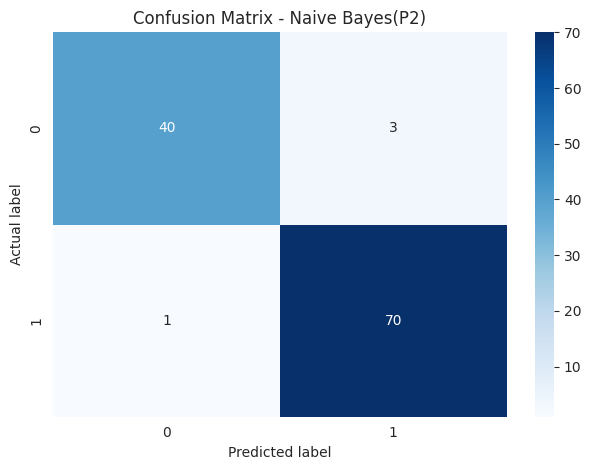

In [18]:
# [P2] Naive Bayes
classifier_NB = GaussianNB()
classifier_NB.fit(X_train_scaled, y_train)

# Predict the target for the test data
y_pred_NB = classifier_NB.predict(X_test_scaled)

# Evaluate the classifier performance in terms of accuracy, precision, recall and f1 score
acc_NB = accuracy_score(y_test, y_pred_NB)
prec_NB = precision_score(y_test, y_pred_NB)
rec_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test, y_pred_NB)

print(f"[P2] Naive Bayes:\n\t"
      f"- Accuracy:  {acc_NB:.4f}\n\t"
      f"- Precision: {prec_NB:.4f}\n\t"
      f"- Recall:    {rec_NB:.4f}\n\t"
      f"- F1 Score:  {f1_NB:.4f}")

# Performance evaluation: Use confusion matrix to see the performance of the model
cnf_matrix_NB = confusion_matrix(y_test, y_pred_NB)

# Visualize the confusion matrix using a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_NB), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Naive Bayes(P2)")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.savefig("images/Confusion Matrix(P2).png")
plt.tight_layout()
plt.show()

### Comparison (Naive Bayes vs. Logistic Regression)
Comparing the accuracy, precision, recall, and F1 score between Naive Bayes and Logistic Regression.

In [20]:
methods = ['Logistic Regression(i)', 'Logistic Regression(ii)', 'NaiveBayes']
acc_lists = [acc_LR, acc_LR_p, acc_NB]
prec_lists = [prec_LR, prec_LR_p, prec_NB]
recall_lists = [rec_LR, rec_LR_p, rec_NB]

comparison_df = pd.DataFrame({
    'Method': methods,
    'Accuracy': acc_lists,
    'Precision': prec_lists,
    'Recall': recall_lists,
})

comparison_df  # in Pycharm, print it

,Method,Accuracy,Precision,Recall
0,Logistic Regression(i),0.973684,0.972222,0.985915
1,Logistic Regression(ii),0.982456,0.972603,1.000000
2,NaiveBayes,0.964912,0.958904,0.985915


### Conclusion(Problem2):

Use pre-trained Gaussian Naive Bayes model to predict the cancer patients. The model achieved the following performance metrics:  

**Accuracy:** 96.49%

**Precision:** 95.89%

**Recall:** 98.59%

**F1 score:** 97.22%

**Comparison with Logistic Regression:**
While Naive Bayes offers slightly faster computation and simplicity, logistic regression demonstrated better precision and overall accuracy. Naive Bayes, however, yielded a high recall, making it useful when minimizing false negatives is crucial.

## Problem 3: SVM Classifier



[P3] SVM Classifier:
	- Accuracy:  0.9561
	- Precision: 0.9714
	- Recall:    0.9577
	- F1 Score:  0.9645


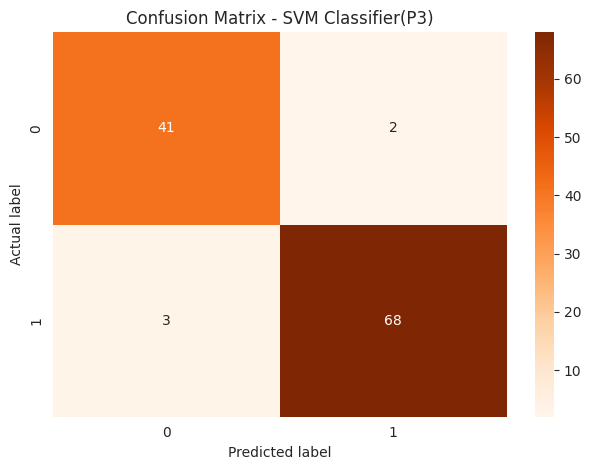

In [24]:
# [P3] SVM Classifier
classifier_SVM = SVC(kernel='linear', C=1.0, random_state=42)
classifier_SVM.fit(X_train_scaled, y_train)

# Predict the target for the test data
y_pred_SVM = classifier_SVM.predict(X_test_scaled)

# Evaluate the classifier performance in terms of accuracy, precision, recall and f1 score
acc_SVM = accuracy_score(y_test, y_pred_SVM)
prec_SVM = precision_score(y_test, y_pred_SVM)
rec_SVM = recall_score(y_test, y_pred_SVM)
f1_SVM = f1_score(y_test, y_pred_SVM)

print(f"[P3] SVM Classifier:\n\t"
      f"- Accuracy:  {acc_SVM:.4f}\n\t"
      f"- Precision: {prec_SVM:.4f}\n\t"
      f"- Recall:    {rec_SVM:.4f}\n\t"
      f"- F1 Score:  {f1_SVM:.4f}")

# Performance evaluation: Use confusion matrix to see the performance of the model
cnf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)

# Visualize the confusion matrix using a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_SVM), annot=True, cmap='Oranges', fmt='g')
plt.title("Confusion Matrix - SVM Classifier(P3)")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.savefig("images/Confusion Matrix(P3).png")
plt.tight_layout()
plt.show()


### Comparison (SVM vs. Logistic Regression vs. Naive Bayes)
Comparing accuracy, precision, recall, and F1 score.

In [25]:
# Comparison
methods = ['Logistic Regression(i)', 'Logistic Regression(ii)', 'Naive Bayes', 'SVM']
acc_lists = [acc_LR, acc_LR_p, acc_NB, acc_SVM]
prec_lists = [prec_LR, prec_LR_p, prec_NB, prec_SVM]
recall_lists = [rec_LR, rec_LR_p, rec_NB, rec_SVM]
f1_lists = [f1_LR, f1_LR_p, f1_NB, f1_SVM]

comparison_df_P3 = pd.DataFrame({
    'Method': methods,
    'Accuracy': acc_lists,
    'Precision': prec_lists,
    'Recall': recall_lists,
    'F1 score': f1_lists
})

comparison_df_P3

,Method,Accuracy,Precision,Recall,F1 score
0,Logistic Regression(i),0.973684,0.972222,0.985915,0.979021
1,Logistic Regression(ii),0.982456,0.972603,1.000000,0.986111
2,Naive Bayes,0.964912,0.958904,0.985915,0.972222
3,SVM,0.956140,0.971429,0.957746,0.964539


### Conclusion(Problem3)

An SVM classifier with a linear kernel was used to predict cancer patients. The model achieved the following performance metrics:

**Accuracy:** 95.61%

**Precision:** 97.14%

**Recall:** 95.77%

**F1 score:** 96.45%

**Comparison**:
SVM shows strong precision, suggesting it is effective at minimizing false positives. However, its slightly lower recall indicates it may miss some positive instances.

## Problem 4: Logistic Regression with PCA


In [29]:
# [P4] Logistic Regression with PCA
# Count features as maximum number of PCA components
max_components = X.shape[1]  # 30

# Training times for each K
n_epochs = 10

# Lists to store averaged metrics for each K
avg_acc_list = []
avg_prec_list = []
avg_rec_list = []
avg_f1_list = []

# Loop over each K
for k in range(1, max_components + 1):
    run_accuracies = []
    run_precisions = []
    run_recalls = []
    run_f1s = []

    # Apply PCA
    pca = PCA(n_components=k)

    for epoch in range(n_epochs):
        X_train_pca = pca.fit_transform(X_train_scaled)  # without random state
        X_test_pca = pca.transform(X_test_scaled)

        lr_pca = LogisticRegression(penalty='l2', C=1.0, max_iter=500)
        lr_pca.fit(X_train_pca, y_train)
        y_pred_pca = lr_pca.predict(X_test_pca)

        # Evaluate
        run_accuracies.append(accuracy_score(y_test, y_pred_pca))
        run_precisions.append(precision_score(y_test, y_pred_pca))
        run_recalls.append(recall_score(y_test, y_pred_pca))
        run_f1s.append(f1_score(y_test, y_pred_pca))

    avg_acc_list.append(np.mean(run_accuracies))
    avg_prec_list.append(np.mean(run_precisions))
    avg_rec_list.append(np.mean(run_recalls))
    avg_f1_list.append(np.mean(run_f1s))

# Find the best K with the highest average accuracy
best_k_acc = np.argmax(avg_acc_list) + 1  # index 0 => K=1
print(f"Optimum K that achieves highest average accuracy:{best_k_acc}")
print(f"Highest average accuracy with PCA:{avg_acc_list[best_k_acc - 1]:.4f}")

Optimum K that achieves highest average accuracy: 2
Highest average accuracy with PCA: 0.9912


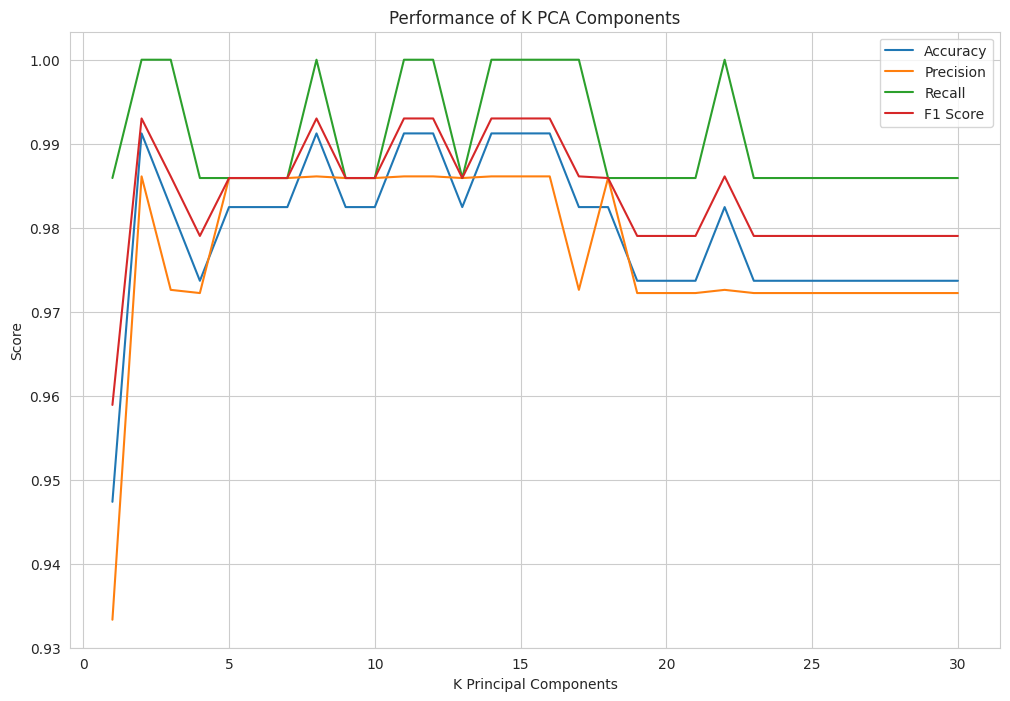

In [30]:
# Plot all metrics in one single plot
metrics_df = pd.DataFrame({
    'K': list(range(1, max_components + 1)),
    'Accuracy': avg_acc_list,
    'Precision': avg_prec_list,
    'Recall': avg_rec_list,
    'F1 Score': avg_f1_list
})

plt.figure(figsize=(12, 8))
plt.plot(metrics_df['K'], metrics_df['Accuracy'], label="Accuracy")
plt.plot(metrics_df['K'], metrics_df['Precision'], label="Precision")
plt.plot(metrics_df['K'], metrics_df['Recall'], label="Recall")
plt.plot(metrics_df['K'], metrics_df['F1 Score'], label="F1 Score")
plt.xlabel("K Principal Components")
plt.ylabel("Score")
plt.title("Performance of K PCA Components")
plt.legend()
plt.grid(True)
plt.savefig("images/Performance_PCA.png")
plt.show()

[P4] Logistic Regression (PCA with Best K = 2):
	- Accuracy:  0.9912
	- Precision: 0.9861
	- Recall:    1.0000
	- F1 Score:  0.9930


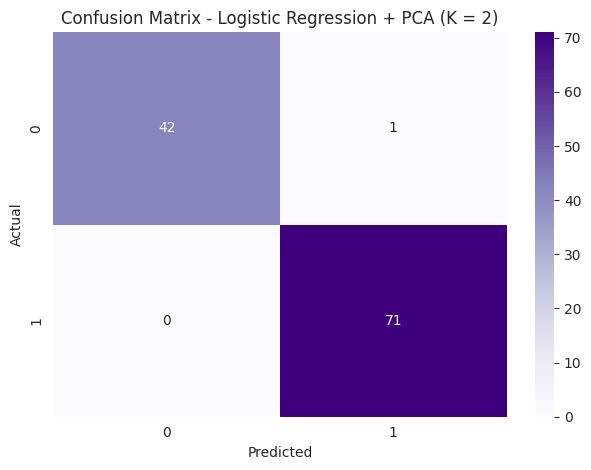

In [33]:
# Use the best K (with the highest average accuracy) to train a final Logistic Regression model
pca_best = PCA(n_components=best_k_acc)
X_train_pca_best = pca_best.fit_transform(X_train_scaled)
X_test_pca_best = pca_best.transform(X_test_scaled)

lr_pca_best = LogisticRegression(penalty='l2', C=1.0, max_iter=500)
lr_pca_best.fit(X_train_pca_best, y_train)
y_pred_best_pca = lr_pca_best.predict(X_test_pca_best)

# Evaluate final metrics using the best K
acc_best_pca = accuracy_score(y_test, y_pred_best_pca)
prec_best_pca = precision_score(y_test, y_pred_best_pca)
rec_best_pca = recall_score(y_test, y_pred_best_pca)
f1_best_pca = f1_score(y_test, y_pred_best_pca)

print(f"[P4] Logistic Regression (PCA with Best K = {best_k_acc}):\n\t"
      f"- Accuracy:  {acc_best_pca:.4f}\n\t"
      f"- Precision: {prec_best_pca:.4f}\n\t"
      f"- Recall:    {rec_best_pca:.4f}\n\t"
      f"- F1 Score:  {f1_best_pca:.4f}")

# Performance evaluation: Use confusion matrix to see the performance of the model
cnf_matrix_pca = confusion_matrix(y_test, y_pred_best_pca)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cnf_matrix_pca, annot=True, cmap='Purples', fmt='g')
plt.title("Confusion Matrix - Logistic Regression + PCA (K = {})".format(best_k_acc))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("images/Confusion Matrix(P4).png")
plt.tight_layout()
plt.show()

### Comparison (Logistic Regression with PCA vs. Logistic Regression vs. Naive Bayes)
Comparing the accuracy, precision, recall, and F1 scores.

In [34]:
# Comparison
methods = ['Logistic Regression(i)', 'Logistic Regression(ii)', 'Naive Bayes', 'Logistic Regression with PCA']
acc_lists = [acc_LR, acc_LR_p, acc_NB, acc_best_pca]
prec_lists = [prec_LR, prec_LR_p, prec_NB, prec_best_pca]
recall_lists = [rec_LR, rec_LR_p, rec_NB, rec_best_pca]
f1_lists = [f1_LR, f1_LR_p, f1_NB, f1_best_pca]

comparison_df_P4 = pd.DataFrame({
    'Method': methods,
    'Accuracy': acc_lists,
    'Precision': prec_lists,
    'Recall': recall_lists,
    'F1 score': f1_lists
})

comparison_df_P4

,Method,Accuracy,Precision,Recall,F1 score
0,Logistic Regression(i),0.973684,0.972222,0.985915,0.979021
1,Logistic Regression(ii),0.982456,0.972603,1.000000,0.986111
2,Naive Bayes,0.964912,0.958904,0.985915,0.972222
3,Logistic Regression with PCA,0.991228,0.986111,1.000000,0.993007


**Conclusion:**

PCA was applied to standardized data, varying the number of principal components (K).The model achieved the following performance metrics:

**Accuracy:** 99.12%

**Precision:** 98.61%

**Recall:** 100%

**F1 score:** 99.30%
  
Dimensionality reduction via PCA notably simplifies the model without sacrificing performance. The finding that K = 2 is optimal suggests that nearly all essential information. This reduction in dimensionality not only streamlines the model and reduces computational cost but also leads to an enhancement in performance metrics compared to using the full 30 features.